# CAO Points Analysis

File include detailed comparison of CAO points in 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020 and 2021 using the functionality in Pandas, plus appropiate plots.

***

### Link to CAO Points Website
http://www.cao.ie/index.php?page=points&bb=mediastats

***

#### Imports of python libraries.

In [1]:
# Convinient package for making HTTP requests.
import requests as rq

# Regular expression.
import re

#Dates and times.
import datetime as dt

#To clean xlms and pdf files.
import pandas as pd

# For downloading.
import urllib.request as urlrq

# Plotting data.
import matplotlib.pyplot as plt
# Numpy.
import numpy as np
import seaborn as sns

## CAO Points 2021
***

### Link to CAO Points 2021 Website
https://www.cao.ie/index.php?/page=point&p=2021

***

***NOTE:***<br>
CAO Points 2021 file is available on the website, can be directy process.<br>
File is save on chosen localization with timestamp.

In [2]:
# Fetch CAO points from the website.
resp = rq.get("http://www2.cao.ie/points/l8.php")
# Check if its connecting.
resp

<Response [200]>

### Save original CAO Points 2021 data set to a HTML file. 

***

In [3]:
# Get the current date and time.
now = dt.datetime.now()
# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# Creating timestamp in file as a filename itself.
pathhtml = 'data/cao2021_' + nowstr + '.html'

In [5]:
# Fixing wrong encoding that server is using. 
original_encoding = resp.encoding
# Change to cp1252
resp.encoding = 'cp1252'

In [6]:
# Save the original html file
with open(pathhtml, 'w') as f:
    f.write(resp.text)

### Use regular expression to select needed lines.

***

In [7]:
# Compile regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

### Loop through the lines of the response.
***

In [8]:
# Writing sorted CAO 2021 points data to a CSV file. 
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [9]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")
            
                    

Total number of lines is 949.


In [10]:
#Read in to Pandas csv file with 2021 Points.
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [11]:
# Show first 5 rows of data.
df2021.head()

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN


## CAO Points 2020
***

### Link to CAO Points 2020 

http://www2.cao.ie/points/CAOPointsCharts2020.xlsx

***

***NOTE:***<br>
CAO Points 2020 file is available on the website as a ***xlsx*** file.<br>
File is save on chosen localization with timestamp.<br>
File is processes directly in the Pandas.

### Save Original File
***

In [12]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [13]:
#Retrive CAO 2020 Points original xlsx file from website.
urlrq.urlretrieve('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', pathxlsx)

('data/cao2020_20211223_095206.xlsx',
 <http.client.HTTPMessage at 0x1edb24de400>)

### Load Spreadsheet using Pandas
***

In [14]:
# Download and parse the excel spreadsheet.
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows=10)

In [15]:
# Show first 5 rows of data.
df2020.head()

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Spot check a random row.
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [17]:
# Spot check the last row.
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [18]:
# Create a file path for the pandas data.
path = 'data/cao2020_' + nowstr + '.csv'

In [19]:
# Save pandas data frame to disk.
df2020.to_csv(path)

In [20]:
# Show first 5 rows of data.
df2020.head()

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## CAO Points 2019
***

### Link CAO Points 2019 
https://www.cao.ie/index.php?page=points&p=2019
***

##### Preparation CAO 2019 pdf file for editing in Pandas ( steps)
- Downloading original file from the website - CAO Points 2019 - pdf file - lvl8_19.pdf  
- Open original pdf file in Microsoft Word.
- Save Microsoft Word's converted PDF in docx format.
- Re-save Word document for editing.
- Delete headers and footers.
- Delete preamble on page 1.
- Select all and copy.
- Paste into Notepad++.
- Remove HEI name headings and paste onto each course line.
- Delete blank lines.
- Replace " ` " to " ' ".
- Remove empty spaces at the end of the lines ( tabs, spaces)

***NOTE*** <br>
Above steps will be repeated for:
- CAO 2018 Points
- CAO 2017 Points
- CAO 2016 Points
- CAO 2015 Points
- CAO 2014 Points
- CAO 2013 Points
- CAO 2012 Points
- CAO 2011 Points
- CAO 2010 Points.

In [21]:
# Read CAO Points 2019 edited from csv (tsv) file to pandas.
df2019 = pd.read_csv("data/lvl8_19_20211115_1016_edited.csv", sep="\t")
# Show first 5 rows of data.
df2019.head()

,Institution,Code,Course,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
2,Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
4,Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0


## CAO Points 2018
***

### Link CAO Points 2018
https://www.cao.ie/index.php?page=points&p=2018
***

##### Preparing CAO 2018 pdf file for editing in Pandas

In [22]:
# Read CAO Points 2018 edited from csv (tsv) file to pandas.
df2018 = pd.read_csv("data/CAO2018_20211115_edited.csv", sep="\t")
# Show first 5 rows of data.
df2018.head()

,Institution,Code,Course,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design (Game Development or Cloud Com...,295,326.0
1,Athlone Institute of Technology,AL810,Quantity Surveying,300,340.0
2,Athlone Institute of Technology,AL820,Mechanical and Polymer Engineering,299,371.0
3,Athlone Institute of Technology,AL830,General Nursing,418,440.0
4,Athlone Institute of Technology,AL832,Psychiatric Nursing,377,388.0


## CAO Points 2017
***

### Link CAO Points 2017
https://www.cao.ie/index.php?page=points&p=2017
***

##### Preparing CAO 2017 pdf file for editing in Pandas

In [23]:
# Read CAO Points 2017 edited from csv (tsv) file to pandas.
df2017 = pd.read_csv("data/CAO2017_edited.csv", sep="\t")
# Show first 5 rows of data.
df2017.head()

,Institution,Code,Course,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design (Game Development or Cloud Com...,290,329.0
1,Athlone Institute of Technology,AL810,Quantity Surveying,311,357.0
2,Athlone Institute of Technology,AL820,Mechanical and Polymer Engineering,300,336.0
3,Athlone Institute of Technology,AL830,General Nursing,398*,418.0
4,Athlone Institute of Technology,AL832,Psychiatric Nursing,378,389.0


## CAO Points 2016
***

### Link CAO Points 2016
https://www.cao.ie/index.php?page=points&p=2016
***

##### Preparing CAO 2016 pdf file for editing in Pandas

In [24]:
# Read CAO Points 2016 edited from csv (tsv) file to pandas.
df2016 = pd.read_csv("data/CAO2016_edited.csv", sep="\t")
# Show first 5 rows of data.
df2016.head()

,Institution,Code,Course,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design (Game Development or Cloud Com...,300,340.0
1,Athlone Institute of Technology,AL810,Quantity Surveying,315,355.0
2,Athlone Institute of Technology,AL820,Mechanical and Polymer Engineering,295,340.0
3,Athlone Institute of Technology,AL830,General Nursing,425*,440.0
4,Athlone Institute of Technology,AL831,Mature Applicants General Nursing,#181,185.0


## CAO Points 2015
***

### Link CAO Points 2015
https://www.cao.ie/index.php?page=points&p=2015
***

##### Preparing CAO 2015 pdf file for editing in Pandas

In [25]:
# Read CAO Points 2015 edited from csv (tsv) file to pandas.
df2015 = pd.read_csv("data/CAO2015_edited.csv", sep="\t")
# Show first 5 rows of data.
df2015.head()

,Institution,Code,Course,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design (Game Development or Cloud Com...,280,345.0
1,Athlone Institute of Technology,AL820,Mechanical and Polymer Engineering,315,355.0
2,Athlone Institute of Technology,AL830,General Nursing,420,435.0
3,Athlone Institute of Technology,AL831,Mature Applicants General Nursing,#176*,182.0
4,Athlone Institute of Technology,AL832,Psychiatric Nursing,390,400.0


## CAO Points 2014
***

### Link CAO Points 2014
https://www.cao.ie/index.php?page=points&p=2014
***

##### Preparing CAO 2014 pdf file for editing in Pandas

In [26]:
# Read CAO Points 2014 edited from csv (tsv) file to pandas.
df2014 = pd.read_csv("data/CAO2014_edited.csv", sep="\t")
# Show first 5 rows of data.
df2014.head()

,Institution,Code,Course,EOS,Mid
0,ATHLONE IT,AL801,Software Design (Common Entry,280,335
1,ATHLONE IT,AL820,Mechanical and Polymer Engineering ...,315,365
2,ATHLONE IT,AL830,General Nursing ...,410,420
3,ATHLONE IT,AL831,Mature Applicants General Nursing ...,#169,173
4,ATHLONE IT,AL832,Psychiatric Nursing ...,390,395


## CAO Points 2013
***

### Link CAO Points 2013
https://www.cao.ie/index.php?page=points&p=2013
***

##### Preparing CAO 2013 pdf file for editing in Pandas

In [27]:
# Read CAO Points 2013 edited from csv (tsv) file to pandas.
df2013 = pd.read_csv("data/CAO2013_edited.csv", sep="\t")
# Show first 5 rows od data.
df2013.head()

,Institution,Code,Course,EOS,Mid
0,ATHLONE IT,AL802,Software Design (Games Development) ...,275,325
1,ATHLONE IT,AL803,Software Design (Cloud Computing) ...,280,345
2,ATHLONE IT,AL830,General Nursing ...,410*,415
3,ATHLONE IT,AL831,Mature Applicants General Nursing ...,566#,581
4,ATHLONE IT,AL832,Psychiatric Nursing ...,395,400


## CAO Points 2012
***

### Link CAO Points 2012
https://www.cao.ie/index.php?page=points&p=2012
***

##### Preparing CAO 2012 pdf file for editing in Pandas

In [28]:
# Read CAO Points 2012 edited from csv (tsv) file to pandas.
df2012 = pd.read_csv("data/CAO2012_edited.csv", sep="\t")
# Show first 5 rows of data.
df2012.head()

,Institution,Code,Course,EOS,Mid
0,ATHLONE IT,AL802,Software Design (Games Development) ...,300,340
1,ATHLONE IT,AL803,Software Design (Web Development) ...,310,335
2,ATHLONE IT,AL805,Construction Technology and Management ...,NaN,NaN
3,ATHLONE IT,AL830,General Nursing ...,415*,430
4,ATHLONE IT,AL831,Mature Applicants General Nursing ...,233#,235


## CAO Points 2011
***

### Link CAO Points 2011
https://www.cao.ie/index.php?page=points&p=2011
***

##### Preparing CAO 2011 pdf file for editing in Pandas

In [29]:
# Read CAO Points 2011 edited from csv (tsv) file to pandas.
df2011 = pd.read_csv("data/CAO2011_edited.csv", sep="\t")
# Show first 5 rows of data.
df2011.head()

,Institution,Code,Course,EOS,Mid
0,ATHLONE IT,AL032,Software Design (Games Development) ...,285,330
1,ATHLONE IT,AL033,Toxicology ...,240,330
2,ATHLONE IT,AL034,Software Design (Web Development) ...,285,340
3,ATHLONE IT,AL035,Construction Technology and Management ...,265,315
4,ATHLONE IT,AL050,Business ...,270,325


## CAO Points 2010
***

### Link CAO Points 2010
https://www.cao.ie/index.php?page=points&p=2010
***

##### Preparing CAO 2010 pdf file for editing in Pandas

In [30]:
# Read CAO Points 2010 edited from csv (tsv) file to pandas.
df2010 = pd.read_csv("data/CAO2010_edited.csv", sep="\t")
# Show first 5 rows of data.
df2010.head()

,Institution,Code,Course,EOS,Mid
0,ATHLONE IT,AL032,Software Design (Games Development) ...,265 (375v),315
1,ATHLONE IT,AL033,Toxicology ...,280,345
2,ATHLONE IT,AL034,Software Design (Web Development) ...,270,300
3,ATHLONE IT,AL035,Construction Technology and Management ...,265,310
4,ATHLONE IT,AL050,Business ...,275,320


## Connecting CAO Points data from 2010-2021 files into one.
***

#### Merching data from different years.

In [31]:
#Take two columns from CAO 2021 data.
courses2021 = df2021[["code", "title"]]
# Check the columns and amount of rows.
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [32]:
# Take two columns from CAO 2020 points.
courses2020 = df2020[["COURSE CODE2", "COURSE TITLE"]]
# Change the labels of columns.
courses2020.columns = ["code", "title"]
# Check the file after changes.
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


### Creating list of all courses.

In [33]:
#Create new data frame with all data.
allcourses = pd.concat([courses2021, courses2020], ignore_index=True)
# Check new data.
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2408,WD208,Manufacturing Engineering
2409,WD210,Software Systems Development
2410,WD211,Creative Computing
2411,WD212,Recreation and Sport Management


In [34]:
# Sort values in the allcourses data.
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
950,AC137,Liberal Arts
176,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
...,...,...
2411,WD212,Recreation and Sport Management
2412,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [35]:
# Check duplicates.
allcourses.loc[175]['title']

'International Business'

In [36]:
# Check duplicates.
allcourses.loc[949]['title']

'International Business'

In [37]:
# Check all duplicates in data.
allcourses.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2408    False
2409     True
2410     True
2411     True
2412     True
Length: 2413, dtype: bool

In [38]:
# Show all duplicates data.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
2404,WD200,Arts (options)
2409,WD210,Software Systems Development
2410,WD211,Creative Computing
2411,WD212,Recreation and Sport Management


In [39]:
# Returns a copy of the data frame with duplicates removed.
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2403,WD195,Architectural and Building Information Modelli...
2405,WD205,Molecular Biology with Biopharmaceutical Science
2406,WD206,Electronic Engineering
2407,WD207,Mechanical Engineering


In [40]:
# Returns a copy of the data frame with duplicates removed.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
2404,WD200,Arts (options)
2409,WD210,Software Systems Development
2410,WD211,Creative Computing
2411,WD212,Recreation and Sport Management


In [41]:
# Return only unique rows based on column "code".
allcourses.drop_duplicates(subset=["code"], inplace=True, ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1512,WD188,Applied Health Care
1513,WD205,Molecular Biology with Biopharmaceutical Science
1514,WD206,Electronic Engineering
1515,WD207,Mechanical Engineering


In [42]:
# Set the index to the code column.
df2021.set_index('code', inplace=True)
# Set columns as 'title', 'p_R1_2021', 'p_R2_2021'.
df2021.columns = ['title', 'p_R1_2021', 'p_R2_2021']

In [43]:
df2021.head()

,title,p_R1_2021,p_R2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN


### JOINING data into one table.
***

#### All points in one table ( all 11 years ) 

In [44]:
# Changing index for code column ( unique values).
allcourses.set_index('code', inplace=True)

#### Add CAO Points 2021 to the 'allcourses' table.

In [45]:
# Add points 2021 to table.
allcourses = allcourses.join(df2021[['p_R1_2021']])
allcourses

,title,p_R1_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
WD188,Applied Health Care,NaN
WD205,Molecular Biology with Biopharmaceutical Science,NaN
WD206,Electronic Engineering,NaN


#### Add CAO Points 2020 to 'allcourses' table.

In [46]:
# Pull needed columns from 2020 Points Data Set.
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
# Set columns as 'code', 'p_R1_2020'.
df2020_r1.columns = ['code', 'p_R1_2020']
df2020_r1

,code,p_R1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [47]:
# Changing index for code column ( unique values).
df2020_r1.set_index('code', inplace=True)
df2020_r1

,p_R1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [48]:
# Join 2020 points to allcourses data set.
allcourses = allcourses.join(df2020_r1)
allcourses

,title,p_R1_2021,p_R1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD188,Applied Health Care,NaN,201
WD205,Molecular Biology with Biopharmaceutical Science,NaN,228
WD206,Electronic Engineering,NaN,179


#### Add CAO Points 2019 to 'allcourses' table.

In [49]:
# Pull needed columns from 2019 Points Data Set.
df2019_r1 = df2019[['Code', 'EOS']]
# Set columns as 'code', 'p_R1_2019'.
df2019_r1.columns = ['code', 'p_R1_2019']
df2019_r1

,code,p_R1_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [50]:
# set the index 
df2019_r1.set_index('code', inplace=True)
df2019_r1

,p_R1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [51]:
# Join 2019 to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307


#### Add CAO Points 2018 to 'allcourses' table.

In [52]:
# Pull needed columns from 2018 Points Data Set.
df2018_r1 = df2018[['Code', 'EOS']]
# Set columns as 'code' and 'p_R1_2018'
df2018_r1.columns = ['code', 'p_R1_2018']
df2018_r1.head()

,code,p_R1_2018
0,AL801,295
1,AL810,300
2,AL820,299
3,AL830,418
4,AL832,377


In [53]:
# Set the index for 'code' column.
df2018_r1.set_index('code', inplace=True)
# Check first 5 rows of data set.
df2018_r1.head()

,p_R1_2018
code,
AL801,295
AL810,300
AL820,299
AL830,418
AL832,377


In [54]:
# Join 2018 points to allcourses data set.
allcourses = allcourses.join(df2018_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018
code,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304,295
AL802,Software Design in Artificial Intelligence for...,313,332,301,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,337,309,NaN
AL805,Computer Engineering for Network Infrastructure,321,333,329,NaN
AL810,Quantity Surveying,328,319,307,300


#### Add CAO Points 2017 to 'allcourses' table.

In [55]:
# Pull needed columns from 2017 Points Data Set.
df2017_r1 = df2017[['Code', 'EOS']]
# Set columns as 'code' and 'p_R1_2017'.
df2017_r1.columns = ['code', 'p_R1_2017']
df2017_r1.head()

,code,p_R1_2017
0,AL801,290
1,AL810,311
2,AL820,300
3,AL830,398*
4,AL832,378


In [56]:
# Set the index for 'code' column.
df2017_r1.set_index('code', inplace=True)
df2017_r1.head()

,p_R1_2017
code,
AL801,290
AL810,311
AL820,300
AL830,398*
AL832,378


In [57]:
# Join 2017 to allcourses.
allcourses = allcourses.join(df2017_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017
code,,,,,,
AC120,International Business,294,209,234,269,281
AC137,Liberal Arts,271,252,252,219,219
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +mat,#,NaN
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +mat,#,NaN
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +mat,#,NaN


#### Add CAO Points 2016 to 'allcourses' table.

In [58]:
# Pull needed columns from 2016 Points Data Set.
df2016_r1 = df2016[['Code', 'EOS']]
# Set columns as 'code' and 'p_R1_2016'.
df2016_r1.columns = ['code', 'p_R1_2016']
df2016_r1.head()

,code,p_R1_2016
0,AL801,300
1,AL810,315
2,AL820,295
3,AL830,425*
4,AL831,#181


In [59]:
# Set the index for 'code' column.
df2016_r1.set_index('code', inplace=True)
df2016_r1.head()

,p_R1_2016
code,
AL801,300
AL810,315
AL820,295
AL830,425*
AL831,#181


In [60]:
# Join 2016 to allcourses.
allcourses = allcourses.join(df2016_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016
code,,,,,,,
AC120,International Business,294,209,234,269,281,255
AC137,Liberal Arts,271,252,252,219,219,295
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +mat,#,NaN,#407
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +mat,#,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +mat,#,NaN,NaN


#### Add CAO Points 2015 to 'allcourses' table.

In [61]:
# Pull needed columns from 2015 Points Data Set.
df2015_r1 = df2015[['Code', 'EOS']]
# Set columns as 'code' and 'p_R1_2015'.
df2015_r1.columns = ['code', 'p_R1_2015']
df2015_r1.head()

,code,p_R1_2015
0,AL801,280
1,AL820,315
2,AL830,420
3,AL831,#176*
4,AL832,390


In [62]:
# Set the index as 'code' column.
df2015_r1.set_index('code', inplace=True)
df2015_r1.head()

,p_R1_2015
code,
AL801,280
AL820,315
AL830,420
AL831,#176*
AL832,390


In [63]:
# Join 2015 to allcourses.
allcourses = allcourses.join(df2015_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015
code,,,,,,,,
AC120,International Business,294,209,234,269,281,255,270
AC137,Liberal Arts,271,252,252,219,219,295,280
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +mat,#,NaN,#407,#
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +mat,#,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +mat,#,NaN,NaN,NaN


#### Add CAO Points 2014 to 'allcourses' table.

In [64]:
# Pull needed columns from 2014 Points Data Set.
df2014_r1 = df2014[['Code', 'EOS']]
# Set columns as 'code' and 'p_R1_2014'
df2014_r1.columns = ['code', 'p_R1_2014']
df2014_r1.head()

,code,p_R1_2014
0,AL801,280
1,AL820,315
2,AL830,410
3,AL831,#169
4,AL832,390


In [65]:
# Set the index as 'code' column.
df2014_r1.set_index('code', inplace=True)
df2014_r1.head()

,p_R1_2014
code,
AL801,280
AL820,315
AL830,410
AL831,#169
AL832,390


In [66]:
# Join 2014 to allcourses.
allcourses = allcourses.join(df2014_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014
code,,,,,,,,,
AC120,International Business,294,209,234,269,281,255,270,220
AC137,Liberal Arts,271,252,252,219,219,295,280,275
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +mat,#,NaN,#407,#,#
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +mat,#,NaN,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +mat,#,NaN,NaN,NaN,NaN


#### Add CAO Points 2013 to 'allcourses' table.

In [67]:
# Pull needed columns from 2013 Points Data Set.
df2013_r1 = df2013[['Code', 'EOS']]
# Set columns as 'code' and 'p_R1_2013'.
df2013_r1.columns = ['code', 'p_R1_2013']
df2013_r1.head()

,code,p_R1_2013
0,AL802,275
1,AL803,280
2,AL830,410*
3,AL831,566#
4,AL832,395


In [68]:
# Set the index as 'code' column.
df2013_r1.set_index('code', inplace=True)
df2013_r1.head()

,p_R1_2013
code,
AL802,275
AL803,280
AL830,410*
AL831,566#
AL832,395


In [69]:
# Join 2013 to allcourses.
allcourses = allcourses.join(df2013_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013
code,,,,,,,,,,
AC120,International Business,294,209,234,269,281,255,270,220,285
AC137,Liberal Arts,271,252,252,219,219,295,280,275,200
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +mat,#,NaN,#407,#,#,atriculate+
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +mat,#,NaN,NaN,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +mat,#,NaN,NaN,NaN,NaN,NaN


#### Add CAO Points 2012 to 'allcourses' table.

In [70]:
# Pull needed columns from 2012 Points Data Set.
df2012_r1 = df2012[['Code', 'EOS']]
# Set columns as 'code' and 'p_R1_2012'.
df2012_r1.columns = ['code', 'p_R1_2012']
df2012_r1.head()

,code,p_R1_2012
0,AL802,300
1,AL803,310
2,AL805,NaN
3,AL830,415*
4,AL831,233#


In [71]:
# Set the index as 'code' column.
df2012_r1.set_index('code', inplace=True)
df2012_r1.head()

,p_R1_2012
code,
AL802,300
AL803,310
AL805,NaN
AL830,415*
AL831,233#


In [72]:
# Join 2012 to allcourses.
allcourses = allcourses.join(df2012_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013,p_R1_2012
code,,,,,,,,,,,
AC120,International Business,294,209,234,269,281,255,270,220,285,295
AC137,Liberal Arts,271,252,252,219,219,295,280,275,200,280
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +mat,#,NaN,#407,#,#,atriculate+,NaN
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +mat,#,NaN,NaN,NaN,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +mat,#,NaN,NaN,NaN,NaN,NaN,NaN


#### Add CAO Points 2011 to 'allcourses' table.

In [73]:
# Pull needed columns from 2011 Points Data Set.
df2011_r1 = df2011[['Code', 'EOS']]
# Set columns as 'code' and 'p_R1_2011'.
df2011_r1.columns = ['code', 'p_R1_2011']
df2011_r1.head()

,code,p_R1_2011
0,AL032,285
1,AL033,240
2,AL034,285
3,AL035,265
4,AL050,270


In [74]:
# Set the index as 'code' column.
df2011_r1.set_index('code', inplace=True)
df2011_r1.head()

,p_R1_2011
code,
AL032,285
AL033,240
AL034,285
AL035,265
AL050,270


In [75]:
# Join 2011 to allcourses.
allcourses = allcourses.join(df2011_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013,p_R1_2012,p_R1_2011
code,,,,,,,,,,,,
AC120,International Business,294,209,234,269,281,255,270,220,285,295,280
AC137,Liberal Arts,271,252,252,219,219,295,280,275,200,280,NaN
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +mat,#,NaN,#407,#,#,atriculate+,NaN,NaN
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +mat,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +mat,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Add CAO Points 2010 to 'allcourses' table.

In [76]:
# Pull needed columns from 2011 Points Data Set.
df2010_r1 = df2010[['Code', 'EOS']]
# Set columns as 'code' and 'p_R1_2010'.
df2010_r1.columns = ['code', 'p_R1_2010']
df2010_r1.head()

,code,p_R1_2010
0,AL032,265 (375v)
1,AL033,280
2,AL034,270
3,AL035,265
4,AL050,275


In [77]:
# Set the index as 'code' column.
df2010_r1.set_index('code', inplace=True)
df2010_r1.head()

,p_R1_2010
code,
AL032,265 (375v)
AL033,280
AL034,270
AL035,265
AL050,275


In [78]:
# Join 2010 to allcourses.
allcourses = allcourses.join(df2010_r1)
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013,p_R1_2012,p_R1_2011,p_R1_2010
code,,,,,,,,,,,,,
AC120,International Business,294,209,234,269,281,255,270,220,285,295,280,305
AC137,Liberal Arts,271,252,252,219,219,295,280,275,200,280,NaN,NaN
AD101,First Year Art and Design (Common Entry portfo...,#554,#+matric,# +mat,#,NaN,#407,#,#,atriculate+,NaN,NaN,NaN
AD102,Graphic Design and Moving Image Design (portfo...,#538,#+matric,# +mat,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,#505,#+matric,# +mat,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning data from special symbols ( *, #, +).

In [79]:
# Replace unwanted characters in whole data set.
allcourses = allcourses.replace(['\*', '\#', '\+'],'',regex=True)
# Checking random lines.
allcourses.iloc[50:100]


,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013,p_R1_2012,p_R1_2011,p_R1_2010
code,,,,,,,,,,,,,
AL811,Civil Engineering,NaN,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL820,Mechanical and Polymer Engineering,327,308,300,299,300,295,315,315,NaN,NaN,NaN,NaN
AL830,General Nursing,451,442,410,418,398,425,420,410,410,415,NaN,NaN
AL832,Mental Health Nursing,440,387,387,377,378,375,390,390,395,395,NaN,NaN
AL835,Pharmacology,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405,NaN,NaN
AL836,Nutrition and Health Science,346,334,352,354,346,350,365,390,395,375,NaN,NaN
AL837,Sports Science with Exercise Physiology,357,351,351,346,354,360,370,380,400,360,375,NaN
AL838,Biotechnology,324,307,302,301,270,270,285,295,275,270,NaN,NaN
AL839,Microbiology,325,325,322,318,318,NaN,NaN,NaN,275,275,NaN,NaN


***NOTE*** <br>
All points cells which has no data or data different than points where replaced by NaN. 
No data -  probably means that course wasnt open in the specific year.
Other data than points - probably there were different categories that were determinating pass for course.

In [80]:
# Check description of data set.
allcourses.describe()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013,p_R1_2012,p_R1_2011,p_R1_2010
count,1517,928,1437,793,740,671,647,609,558,528,488,430,388
unique,1004,319,389,282,262,267,124,108,105,95,100,85,87
top,Business,300,AQA,300,300,300,300,300,300,300,430,300,300
freq,31,19,26,27,23,20,47,43,29,27,16,22,17


In [81]:
# Check the columns names.
allcolumns = allcourses.columns
allcolumns

Index(['title', 'p_R1_2021', 'p_R1_2020', 'p_R1_2019', 'p_R1_2018',
       'p_R1_2017', 'p_R1_2016', 'p_R1_2015', 'p_R1_2014', 'p_R1_2013',
       'p_R1_2012', 'p_R1_2011', 'p_R1_2010'],
      dtype='object')

In [82]:
# Check first rows.
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013,p_R1_2012,p_R1_2011,p_R1_2010
code,,,,,,,,,,,,,
AC120,International Business,294,209,234,269,281,255,270,220,285,295,280,305
AC137,Liberal Arts,271,252,252,219,219,295,280,275,200,280,NaN,NaN
AD101,First Year Art and Design (Common Entry portfo...,554,matric,mat,,NaN,407,,,atriculate,NaN,NaN,NaN
AD102,Graphic Design and Moving Image Design (portfo...,538,matric,mat,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,505,matric,mat,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Check types of data.
allcourses.dtypes

title        object
p_R1_2021    object
p_R1_2020    object
p_R1_2019    object
p_R1_2018    object
p_R1_2017    object
p_R1_2016    object
p_R1_2015    object
p_R1_2014    object
p_R1_2013    object
p_R1_2012    object
p_R1_2011    object
p_R1_2010    object
dtype: object

In [84]:
# Check info of dataset.
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, AC120 to WD232
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1517 non-null   object
 1   p_R1_2021  928 non-null    object
 2   p_R1_2020  1437 non-null   object
 3   p_R1_2019  793 non-null    object
 4   p_R1_2018  740 non-null    object
 5   p_R1_2017  671 non-null    object
 6   p_R1_2016  647 non-null    object
 7   p_R1_2015  609 non-null    object
 8   p_R1_2014  558 non-null    object
 9   p_R1_2013  528 non-null    object
 10  p_R1_2012  488 non-null    object
 11  p_R1_2011  430 non-null    object
 12  p_R1_2010  388 non-null    object
dtypes: object(13)
memory usage: 198.2+ KB


In [85]:
# Itereate through all data set column by column.
for column in allcourses.columns[1:]:
    # Clean all text ( non_numeric) data from cells.
    allcourses[column].replace(r"[a-zA-Z%]",np.nan, inplace=True)
# Check first 5 rows for changes.  
allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013,p_R1_2012,p_R1_2011,p_R1_2010
code,,,,,,,,,,,,,
AC120,International Business,294,209,234,269,281,255,270,220,285,295,280,305
AC137,Liberal Arts,271,252,252,219,219,295,280,275,200,280,NaN,NaN
AD101,First Year Art and Design (Common Entry portfo...,554,matric,mat,,NaN,407,,,atriculate,NaN,NaN,NaN
AD102,Graphic Design and Moving Image Design (portfo...,538,matric,mat,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,505,matric,mat,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### IMPORTANT
After checking all the data, no we will remove all non-numeric inserts in cells. We will clean all columns except index column and "title" column. Here we would like to keep our object type datas.

- check the data types
- iterate through columns where we want apply changes
- use replace method to replace unwanted data with '' empty string or NaN value
- check first few rows if changes are visible
- check type of datas


In [86]:
# Changing data to numeric.
for column in allcourses.columns[1:]:
    # Fill in empty cells with NaN value.
    allcourses[column] = pd.to_numeric(allcourses[column], errors = "coerce")
    

allcourses.head()

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013,p_R1_2012,p_R1_2011,p_R1_2010
code,,,,,,,,,,,,,
AC120,International Business,294.0,209.0,234.0,269.0,281.0,255.0,270.0,220.0,285.0,295.0,280.0,305.0
AC137,Liberal Arts,271.0,252.0,252.0,219.0,219.0,295.0,280.0,275.0,200.0,280.0,NaN,NaN
AD101,First Year Art and Design (Common Entry portfo...,554.0,NaN,NaN,NaN,NaN,407.0,NaN,NaN,NaN,NaN,NaN,NaN
AD102,Graphic Design and Moving Image Design (portfo...,538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,505.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check if our data became numeric after changes.

In [87]:
# Check data types.
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, AC120 to WD232
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1517 non-null   object 
 1   p_R1_2021  923 non-null    float64
 2   p_R1_2020  1394 non-null   float64
 3   p_R1_2019  774 non-null    float64
 4   p_R1_2018  722 non-null    float64
 5   p_R1_2017  668 non-null    float64
 6   p_R1_2016  644 non-null    float64
 7   p_R1_2015  602 non-null    float64
 8   p_R1_2014  549 non-null    float64
 9   p_R1_2013  519 non-null    float64
 10  p_R1_2012  483 non-null    float64
 11  p_R1_2011  427 non-null    float64
 12  p_R1_2010  383 non-null    float64
dtypes: float64(12), object(1)
memory usage: 198.2+ KB


In [88]:
# Counting values in first column.
allcourses['p_R1_2021'].value_counts()

300.0    19
270.0    15
309.0    13
498.0    11
308.0    11
         ..
414.0     1
497.0     1
348.0     1
747.0     1
737.0     1
Name: p_R1_2021, Length: 317, dtype: int64

In [89]:
# Seperate firsy column from data set.
c_2021 = allcourses['p_R1_2021']

In [90]:
# Check min and max values.
c_2021.describe()

count     923.000000
mean      407.666306
std       128.706224
min        57.000000
25%       303.000000
50%       391.000000
75%       499.000000
max      1028.000000
Name: p_R1_2021, dtype: float64

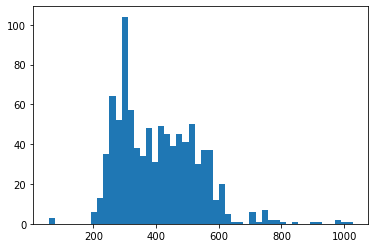

In [91]:
# Plot first column 2021.
plt.hist(c_2021, bins=50)
plt.show()

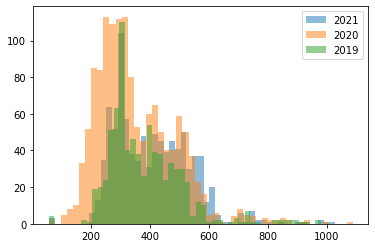

In [92]:
# Plotting compering of 2021 , 2020 , 2019.
plt.hist(allcourses['p_R1_2021'], bins=50, alpha=0.5)
plt.hist(allcourses['p_R1_2020'], bins=50, alpha=0.5)
plt.hist(allcourses['p_R1_2019'], bins=50, alpha=0.5)
plt.legend(['2021', '2020', '2019'])
plt.show()

In [93]:
# Change data into numpy.
# Stack all together to have better plot.
all_three = np.vstack([allcourses['p_R1_2021'], allcourses['p_R1_2020'], allcourses['p_R1_2019']]).T
all_three

array([[294., 209., 234.],
       [271., 252., 252.],
       [554.,  nan,  nan],
       ...,
       [230., 253., 273.],
       [266.,  nan,  nan],
       [261.,  nan,  nan]])

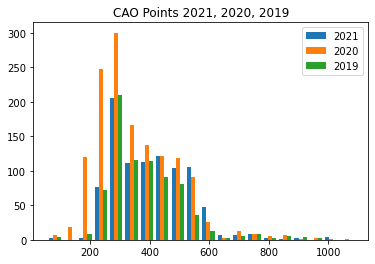

In [95]:
# Plot histogram.
plt.hist(all_three, bins=20)
plt.legend(['2021', '2020', '2019'])
plt.title("CAO Points 2021, 2020, 2019")
plt.show()

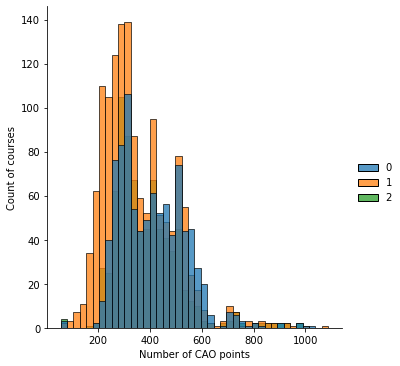

In [96]:
# Use seaborn to see density.
cao_p = sns.displot(all_three)
cao_p.set_axis_labels('Number of CAO points', 'Count of courses')
cao_p.set_titles('CAO Points 2021,2020,2019')

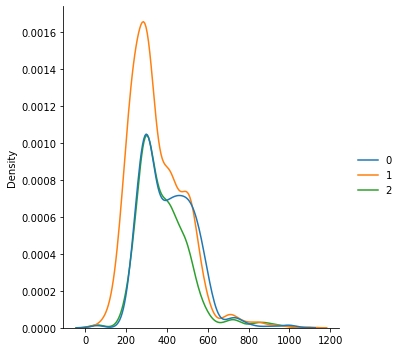

In [97]:
# Plot KDE.
sns.displot(all_three, kind='kde')

In [98]:
# Separate just rows with full data.
# All courses who had points for 2021 - 2010.
data_all_points = allcourses.dropna()
data_all_points

,title,p_R1_2021,p_R1_2020,p_R1_2019,p_R1_2018,p_R1_2017,p_R1_2016,p_R1_2015,p_R1_2014,p_R1_2013,p_R1_2012,p_R1_2011,p_R1_2010
code,,,,,,,,,,,,,
AC120,International Business,294.0,209.0,234.0,269.0,281.0,255.0,270.0,220.0,285.0,295.0,280.0,305.0
AS001,Education Home Economics and Biology - with c...,542.0,510.0,456.0,462.0,473.0,465.0,490.0,510.0,480.0,500.0,500.0,480.0
AS002,Education Home Economics and Religious Ed - with,464.0,441.0,400.0,433.0,419.0,420.0,440.0,440.0,435.0,450.0,470.0,460.0
AS003,Education Home Economics and Irish - with con...,463.0,440.0,421.0,409.0,398.0,425.0,375.0,410.0,455.0,480.0,455.0,440.0
AS110,General Nursing,440.0,419.0,391.0,388.0,387.0,405.0,405.0,405.0,405.0,410.0,400.0,395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD147,Pharmaceutical Science,288.0,293.0,298.0,306.0,337.0,350.0,350.0,365.0,355.0,315.0,325.0,355.0
WD150,Criminal Justice Studies,280.0,270.0,271.0,270.0,278.0,285.0,280.0,285.0,300.0,310.0,315.0,365.0
WD161,Computer Forensics and Security,270.0,255.0,262.0,288.0,297.0,265.0,300.0,305.0,275.0,290.0,300.0,345.0


***NOTE***<br>
We have 345 courses which has points trough 2010- 2021.
Let's plot them.

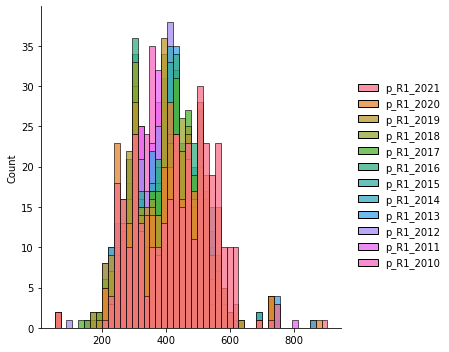

In [99]:
# Plot all courses with points.
sns.displot(data_all_points)

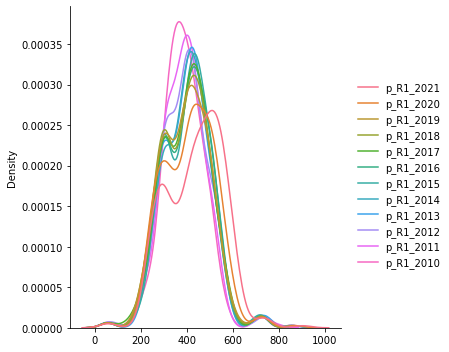

In [100]:
# Plot KDE for all pointed courses.
sns.displot(data_all_points, kind='kde')

***NOTE***<br>
We can see that through years amount of points needed was higher.

### REFERENCES:
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
